In [33]:
import os
import numpy as np
import re

In [34]:
class scan:
     def __init__(self):
        self.ID = "" 
        self.annealed = False
        self.reflection = "004"
        self.omega = []
        self.intensity = []

Here I just import all files as a list of structs (or classes, whatever)

In [35]:
projections_path = "test_batch/Projected_0-200/"

regex = r"\d{5}"

scans = []

for fileID in os.listdir(projections_path):
    file = os.fsdecode(fileID)
    file = projections_path + file
    temp = scan()

    temp.ID = (re.findall(r'(?<!\d)(\d{5})(?!\d)', file))[0]

    if temp.ID == None:
        print("Sample ID is not known!")
        exit(1)

    if "annealed" in file:
        temp.annealed = True
    elif "as_grown":
        temp.annealed = False
    else:
        print("Error, not a known annealing state!")
        exit(1)

    if "004" in file:
        temp.reflection = "004"
    elif "224" in file:
         temp.reflection = "224"
    else:
        print("Error, not a known reflection!")
        exit(1)
    
    temp.omega, _, _, _, _, _, _, _, _, temp.intensity = np.genfromtxt(file, dtype=float, skip_header=7, unpack=True)

    scans.append(temp)

In [36]:
def shift_peak(scan):
    peak_Si = 34.6
    peak_el = scan.intensity.argmax()
    traslation = peak_Si - scan.omega[peak_el]
    scan.omega = scan.omega + traslation
    return scan

def normalize_intensity(scan):
    intensity_max = scan.intensity.max()
    scan.intensity = scan.intensity/intensity_max
    return scan
    

Text(0, 0.5, 'Relative Intensity [counts/max_counts]')

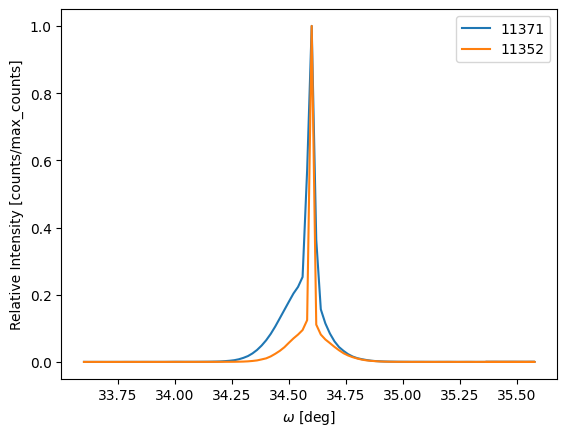

In [37]:
import matplotlib.pyplot as plt

for scan in scans:
    if scan.reflection == "004" and scan.annealed == True:
        t = shift_peak(scan)
        t = normalize_intensity(t)
        plt.plot(t.omega, t.intensity, label = t.ID)
plt.legend()
plt.xlabel(r"$\omega$ [deg]")
plt.ylabel("Relative Intensity [counts/max_counts]")
